# What provide Numpy to Python ?

- `ndarray` multi-dimensional array object
- derived objects such as masked arrays and matrices
- `ufunc` fast array mathematical operations.
- Offers some Matlab-ish capabilities within Python
- Initially developed by [Travis Oliphant](https://www.continuum.io/people/travis-oliphant).
- Numpy 1.0 released October, 2006.
- The [SciPy.org website](https://docs.scipy.org/doc/numpy) is very helpful.
- NumPy fully supports an object-oriented approach.

# Routines for fast operations on arrays.

    - shape manipulation
    - sorting
    - I/O
    - FFT
    - basic linear algebra
    - basic statistical operations
    - random simulation
    - statistics
    - and much more...

# Getting Started with NumPy

- It is handy to import everything from NumPy into a Python console:
```python
from numpy import *
```
- But it is easier to read and debug if you use explicit imports.
```python
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
```

In [23]:
import numpy as np
print(np.__version__)

1.14.2


# Why Arrays ?

- Python lists are slow to process and use a lot of memory.
- For tables, matrices, or volumetric data, you need lists of lists of lists... which becomes messy to program.

In [24]:
from random import random
from operator import truediv

In [25]:
l1 = [random() for i in range(1000)]
l2 = [random() for i in range(1000)]
%timeit s = sum(map(truediv,l1,l2))

88.1 µs ± 824 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [26]:
a1 = np.array(l1)
a2 = np.array(l2)
%timeit s = np.sum(a1/a2)

10.5 µs ± 66.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# Numpy Arrays: The `ndarray` class.

- There are important differences between NumPy arrays and Python lists:
    - NumPy arrays have a fixed size at creation.
    - NumPy arrays elements are all required to be of the same data type.
    - NumPy arrays operations are performed in compiled code for performance.
- Most of today's scientific/mathematical Python-based software use NumPy arrays.
- NumPy gives us the code simplicity of Python, but the operation is speedily executed by pre-compiled C code.

In [27]:
a = np.array([0,1,2,3])  #  list
b = np.array((4,5,6,7))  #  tuple
c = np.matrix('8 9 0 1') #  string (matlab syntax)

In [28]:
print(a,b,c)

[0 1 2 3] [4 5 6 7] [[8 9 0 1]]


## Element wise operations are the “default mode” 

In [29]:
a*b,a+b

(array([ 0,  5, 12, 21]), array([ 4,  6,  8, 10]))

In [30]:
5*a, 5+a

(array([ 0,  5, 10, 15]), array([5, 6, 7, 8]))

In [31]:
a @ b, np.dot(a,b)  # Matrix multiplication

(38, 38)

#  NumPy Arrays Properties

In [32]:
a = np.array([1,2,3,4,5]) # Simple array creation

In [33]:
type(a) # Checking the type

numpy.ndarray

In [34]:
a.dtype # Print numeric type of elements

dtype('int64')

In [35]:
a.itemsize # Print Bytes per element

8

In [36]:
a.shape # returns a tuple listing the length along each dimension

(5,)

In [37]:
np.size(a), a.size # returns the entire number of elements.

(5, 5)

In [38]:
a.ndim  # Number of dimensions

1

In [39]:
a.nbytes # Memory used

40

- ** Always use `shape` or `size` for numpy arrays instead of `len` **
- `len` gives same information only for 1d array.

# Functions to allocate arrays

In [40]:
x = np.zeros((2,),dtype=('i4,f4,a10'))
x

array([(0, 0., b''), (0, 0., b'')],
      dtype=[('f0', '<i4'), ('f1', '<f4'), ('f2', 'S10')])

`empty, empty_like, ones, ones_like, zeros, zeros_like, full, full_like`

#  Setting Array Elements Values

In [41]:
a = np.array([1,2,3,4,5])
print(a.dtype)

int64


In [42]:
a[0] = 10 # Change first item value
a, a.dtype

(array([10,  2,  3,  4,  5]), dtype('int64'))

In [43]:
a.fill(0) # slighty faster than a[:] = 0
a

array([0, 0, 0, 0, 0])

# Setting Array Elements Types

In [44]:
b = np.array([1,2,3,4,5.0]) # Last item is a float
b, b.dtype

(array([1., 2., 3., 4., 5.]), dtype('float64'))

In [45]:
a.fill(3.0)  # assigning a float into a int array 
a[1] = 1.5   # truncates the decimal part
print(a.dtype, a)

int64 [3 1 3 3 3]


In [46]:
a.astype('float64') # returns a new array containing doubles

array([3., 1., 3., 3., 3.])

In [47]:
np.asfarray([1,2,3,4]) # Return an array converted to a float type

array([1., 2., 3., 4.])

# Slicing x[lower:upper:step]
- Extracts a portion of a sequence by specifying a lower and upper bound.
- The lower-bound element is included, but the upper-bound element is **not** included.
- The default step value is 1 and can be negative.

In [48]:
a = np.array([10,11,12,13,14])

In [49]:
a[:2], a[-5:-3], a[0:2], a[-2:] # negative indices work

(array([10, 11]), array([10, 11]), array([10, 11]), array([13, 14]))

In [50]:
a[::2], a[::-1]

(array([10, 12, 14]), array([14, 13, 12, 11, 10]))

### Exercise: 
- Compute derivative of $f(x) = \sin(x)$ with finite difference method.
$$
    \frac{\partial f}{\partial x} \sim \frac{f(x+dx)-f(x)}{dx}
$$

derivatives values are centered in-between sample points.

In [51]:
x, dx = np.linspace(0,4*np.pi,100, retstep=True)
y = np.sin(x)

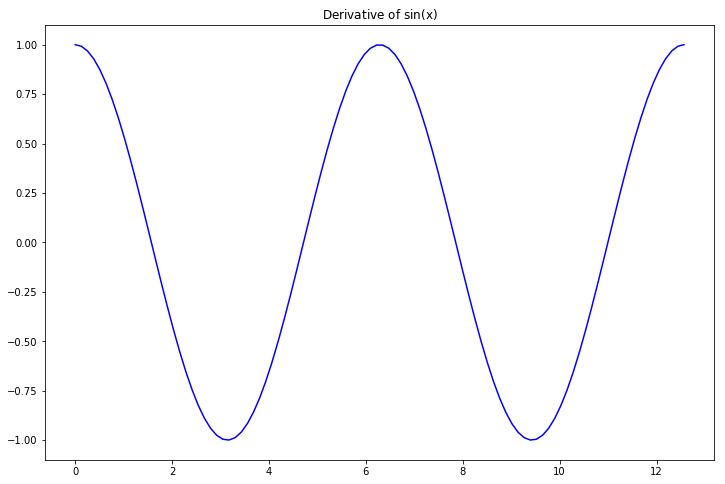

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12.,8.] # Increase plot size
plt.plot(x, np.cos(x),'b')
plt.title(r"$\rm{Derivative\ of}\ \sin(x)$");

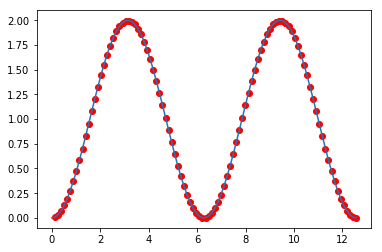

In [53]:
# Compute integral of x numerically
avg_height = 0.5*(y[1:]+y[:-1])
int_sin = np.cumsum(dx*avg_height)
plt.plot(x[1:], int_sin, 'ro', x, np.cos(0)-np.cos(x));

# Multidimensional array

In [54]:
a = np.arange(4*3).reshape(4,3) # NumPy array
l = [[0,1,2],[3,4,5],[6,7,8],[9,10,11]] # Python List

In [55]:
print(a)
print(l)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11]]


In [56]:
l[-1][-1] # Access to last item

11

In [57]:
print(a[-1,-1])  # Indexing syntax is different with NumPy array
print(a[0,0])    # returns the first item
print(a[1,:])    # returns the second line

11
0
[3 4 5]


In [58]:
print(a[1]) # second line with 2d array
print(a[:,-1])  # last column

[3 4 5]
[ 2  5  8 11]


### Exercise 
- We compute numerically the Laplace Equation Solution using Finite Difference Method
- Replace the computation of the discrete form of Laplace equation with numpy arrays
$$
T_{i,j} = \frac{1}{4} ( T_{i+1,j} + T_{i-1,j} + T_{i,j+1} + T_{i,j-1})
$$
- The function numpy.allclose can help you to compute the residual.

(2457, 1.0022293826789268e-05)
iterations =  2457
CPU times: user 32.8 s, sys: 496 ms, total: 33.3 s
Wall time: 33.1 s


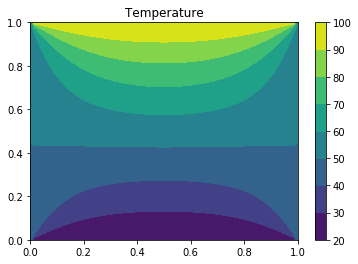

In [59]:
%%time
# Boundary conditions
Tnorth, Tsouth, Twest, Teast = 100, 20, 50, 50

# Set meshgrid
n, l = 64, 1.0
X, Y = np.meshgrid(np.linspace(0,l,n), np.linspace(0,l,n))
T = np.zeros((n,n))

# Set Boundary condition
T[n-1:, :] = Tnorth
T[:1, :]   = Tsouth
T[:, n-1:] = Teast
T[:, :1]   = Twest

residual = 1.0   
istep = 0
while residual > 1e-5 :
    istep += 1
    print ((istep, residual), end="\r")
    residual = 0.0   
    for i in range(1, n-1):
        for j in range(1, n-1):
            T_old = T[i,j]
            T[i, j] = 0.25 * (T[i+1,j] + T[i-1,j] + T[i,j+1] + T[i,j-1])
            if T[i,j]>0:
                residual=max(residual,abs((T_old-T[i,j])/T[i,j]))


print()
print("iterations = ",istep)
plt.title("Temperature")
plt.contourf(X, Y, T)
plt.colorbar()

# Arrays to ASCII files


In [60]:
x = y = z = np.arange(0.0,5.0,1.0)

In [61]:
np.savetxt('test.out', (x,y,z), delimiter=',')   # X is an array
%cat test.out

0.000000000000000000e+00,1.000000000000000000e+00,2.000000000000000000e+00,3.000000000000000000e+00,4.000000000000000000e+00
0.000000000000000000e+00,1.000000000000000000e+00,2.000000000000000000e+00,3.000000000000000000e+00,4.000000000000000000e+00
0.000000000000000000e+00,1.000000000000000000e+00,2.000000000000000000e+00,3.000000000000000000e+00,4.000000000000000000e+00


In [62]:
np.savetxt('test.out', (x,y,z), fmt='%1.4e')   # use exponential notation
%cat test.out

0.0000e+00 1.0000e+00 2.0000e+00 3.0000e+00 4.0000e+00
0.0000e+00 1.0000e+00 2.0000e+00 3.0000e+00 4.0000e+00
0.0000e+00 1.0000e+00 2.0000e+00 3.0000e+00 4.0000e+00


# Arrays from ASCII files

In [63]:
np.loadtxt('test.out')

array([[0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.]])

- [save](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.save.html#numpy.save): Save an array to a binary file in NumPy .npy format
- [savez](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.savez.html#numpy.savez) : Save several arrays into an uncompressed .npz archive
- [savez_compressed](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.savez_compressed.html#numpy.savez_compressed): Save several arrays into a compressed .npz archive
- [load](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.load.html#numpy.load): Load arrays or pickled objects from .npy, .npz or pickled files.

## H5py

Pythonic interface to the HDF5 binary data format. [h5py user manual](http://docs.h5py.org)

In [64]:
import h5py as h5

with h5.File('test.h5','w') as f:
    f['x'] = x
    f['y'] = y
    f['z'] = z

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [47]:
with h5.File('test.h5','r') as f:
    for field in f.keys():
        print(field+':',f[field].value)
       

x: [0. 1. 2. 3. 4.]
y: [0. 1. 2. 3. 4.]
z: [0. 1. 2. 3. 4.]


# Slices Are References
- Slices are references to memory in the original array.
- Changing values in a slice also changes the original array.


In [48]:
a = np.arange(10)
b = a[3:6]
b  # `b` is a view of array `a` and `a` is called base of `b`

array([3, 4, 5])

In [49]:
b[0] = -1
a  # you change a view the base is changed.

array([ 0,  1,  2, -1,  4,  5,  6,  7,  8,  9])

- Numpy does not copy if it is not necessary to save memory.

In [50]:
c = a[7:8].copy() # Explicit copy of the array slice
c[0] = -1 
a

array([ 0,  1,  2, -1,  4,  5,  6,  7,  8,  9])

# Fancy Indexing

In [51]:
a = np.fromfunction(lambda i, j: (i+1)*10+j, (4, 5), dtype=int)
a

array([[10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [52]:
np.random.shuffle(a.flat) # shuffle modify only the first axis
a

array([[30, 34, 22, 31, 11],
       [21, 10, 12, 24, 23],
       [32, 14, 41, 40, 42],
       [33, 20, 43, 44, 13]])

In [93]:
locations = a % 3 == 0 # locations can be used as a mask
a[locations] = 0 #set to 0 only the values that are divisible by 3
a

array([[ 1,  2,  0,  4],
       [ 5,  0,  7,  8],
       [ 0, 10, 11,  0],
       [13, 14,  0, 16],
       [17,  0, 19, 20]])

In [94]:
a += a == 0
a

array([[ 1,  2,  1,  4],
       [ 5,  1,  7,  8],
       [ 1, 10, 11,  1],
       [13, 14,  1, 16],
       [17,  1, 19, 20]])

### `numpy.take`

In [66]:
a[1:3,2:5]

array([[5],
       [8]])

In [67]:
np.take(a,[[6,7],[10,11]])  # Use flatten array indices

array([[ 6,  7],
       [10, 11]])

# Changing array shape

In [55]:
grid = np.indices((2,3)) # Return an array representing the indices of a grid.
grid[0]

array([[0, 0, 0],
       [1, 1, 1]])

In [56]:
grid[1]

array([[0, 1, 2],
       [0, 1, 2]])

In [57]:
grid.flat[:] # Return a view of grid array

array([0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 1, 2])

In [58]:
grid.flatten() # Return a copy

array([0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 1, 2])

In [59]:
np.ravel(grid, order='C') # A copy is made only if needed.

array([0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 1, 2])

# Sorting

In [60]:
a=np.array([5,3,6,1,6,7,9,0,8])
np.sort(a) #. Return a view

array([0, 1, 3, 5, 6, 6, 7, 8, 9])

In [61]:
a

array([5, 3, 6, 1, 6, 7, 9, 0, 8])

In [62]:
a.sort() # Change the array inplace
a

array([0, 1, 3, 5, 6, 6, 7, 8, 9])

# Transpose-like operations

In [63]:
a = np.array([5,3,6,1,6,7,9,0,8])
b = a
b.shape = (3,3) # b is a reference so a will be changed

In [64]:
a

array([[5, 3, 6],
       [1, 6, 7],
       [9, 0, 8]])

In [65]:
c = a.T # Return a view so a is not changed
np.may_share_memory(a,c)

True

In [66]:
c[0,0] = -1 # c is stored in same memory so change c you change a
a

array([[-1,  3,  6],
       [ 1,  6,  7],
       [ 9,  0,  8]])

In [67]:
c  # is a transposed view of a

array([[-1,  1,  9],
       [ 3,  6,  0],
       [ 6,  7,  8]])

In [68]:
b  # b is a reference to a

array([[-1,  3,  6],
       [ 1,  6,  7],
       [ 9,  0,  8]])

In [69]:
c.base  # When the array is not a view `base` return None

array([[-1,  3,  6],
       [ 1,  6,  7],
       [ 9,  0,  8]])

# Methods Attached to NumPy Arrays

In [70]:
a = np.arange(20).reshape(4,5)
np.random.shuffle(a.flat)
a

array([[ 0,  4,  1, 17,  8],
       [13, 11, 14,  9,  6],
       [ 2, 19, 18, 12, 16],
       [ 7,  3,  5, 10, 15]])

In [71]:
a = (a - a.mean())/ a.std() # Standardize the matrix
print(a)

[[-1.64750894 -0.95382097 -1.47408695  1.30066495 -0.26013299]
 [ 0.60697698  0.26013299  0.78039897 -0.086711   -0.60697698]
 [-1.30066495  1.64750894  1.47408695  0.43355498  1.12724296]
 [-0.43355498 -1.12724296 -0.78039897  0.086711    0.95382097]]


In [72]:
np.set_printoptions(precision=4)
print(a)

[[-1.6475 -0.9538 -1.4741  1.3007 -0.2601]
 [ 0.607   0.2601  0.7804 -0.0867 -0.607 ]
 [-1.3007  1.6475  1.4741  0.4336  1.1272]
 [-0.4336 -1.1272 -0.7804  0.0867  0.9538]]


In [73]:
a.argmax() # max position in the memory contiguous array

11

In [74]:
np.unravel_index(a.argmax(),a.shape) # get position in the matrix

(2, 1)

# Array Operations over a given axis

In [75]:
a = np.arange(20).reshape(5,4)
np.random.shuffle(a.flat)

In [76]:
a.sum(axis=0) # sum of each column

array([55, 51, 42, 42])

In [77]:
np.apply_along_axis(sum, axis=0, arr=a)

array([55, 51, 42, 42])

In [78]:
np.apply_along_axis(sorted, axis=0, arr=a)

array([[ 3,  2,  0,  1],
       [ 4,  6,  8,  5],
       [12, 13,  9,  7],
       [17, 14, 10, 11],
       [19, 16, 15, 18]])

You can replace the `sorted` builtin fonction by a user defined function.

In [79]:
np.empty(10)

array([ 0.1 ,  0.2 ,  0.25,  0.5 ,  1.  ,  2.  ,  2.5 ,  5.  , 10.  ,
       20.  ])

In [80]:
np.linspace(0,2*np.pi,10)

array([0.    , 0.6981, 1.3963, 2.0944, 2.7925, 3.4907, 4.1888, 4.8869,
       5.5851, 6.2832])

In [81]:
np.arange(0,2.+0.4,0.4)

array([0. , 0.4, 0.8, 1.2, 1.6, 2. ])

In [82]:
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [83]:
a = np.diag(range(4))
a

array([[0, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3]])

In [84]:
a[:,:,np.newaxis]

array([[[0],
        [0],
        [0],
        [0]],

       [[0],
        [1],
        [0],
        [0]],

       [[0],
        [0],
        [2],
        [0]],

       [[0],
        [0],
        [0],
        [3]]])

### Create the following arrays
```python
[100 101 102 103 104 105 106 107 108 109]
```
Hint: numpy.arange
```python
[-2. -1.8 -1.6 -1.4 -1.2 -1. -0.8 -0.6 -0.4 -0.2 0. 
0.2 0.4 0.6 0.8 1. 1.2 1.4 1.6 1.8]
```
Hint: numpy.linspace
```python
[[ 0.001	0.00129155 0.0016681 0.00215443 0.00278256 
     0.003593810.00464159 0.00599484 0.00774264 0.01]
```
Hint: numpy.logspace
```python
[[ 0. 0. -1. -1. -1.] 
 [ 0. 0.  0. -1. -1.] 
 [ 0. 0.  0.  0. -1.]
 [ 0. 0.  0.  0.  0.]
 [ 0. 0.  0.  0.  0.] 
 [ 0. 0.  0.  0.  0.] 
 [ 0. 0.  0.  0.  0.]]
```
Hint: numpy.tri, numpy.zeros, numpy.transpose

```python
[[ 0.  1.  2.  3. 4.] 
 [-1.  0.  1.  2. 3.] 
 [-1. -1.  0.  1. 2.] 
 [-1. -1. -1.  0. 1.] 
 [-1. -1. -1. -1. 0.]]
```
Hint: numpy.ones, numpy.diag

* Compute the integral numerically with Trapezoidal rule
$$
I = \int_{-\infty}^\infty e^{-v^2} dv
$$
with  $v \in [-10;10]$ and n=20.



# Views and Memory Management
- If it exists one view of a NumPy array, it can be destroyed.


In [85]:
big = np.arange(1000000)
small = big[:5]
del big
small.base

array([     0,      1,      2, ..., 999997, 999998, 999999])

- Array called `big` is still allocated.
- Sometimes it is better to create a copy.

In [86]:
big = np.arange(1000000)
small = big[:5].copy()
del big
print(small.base)

None


## Change memory alignement

In [114]:
del(a)
a = np.arange(20).reshape(5,4)
print(a.flags)

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False


In [115]:
b = np.asfortranarray(a) # makes a copy
b.flags

  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [91]:
b.base is a

False

You can also create a fortran array with array function.

In [92]:
c = np.array([[1,2,3],[4,5,6]])
f = np.asfortranarray(c)

In [93]:
print(f.ravel(order='K')) # Return a 1D array using memory order
print(c.ravel(order='K')) # Copy is made only if necessary

[1 4 2 5 3 6]
[1 2 3 4 5 6]


# Broadcasting rules

Broadcasting rules allow you to make an outer product between two vectors: the first method involves array tiling, the second one involves broadcasting. The last method is significantly faster.


In [92]:
n = 1000
a = np.arange(n)
ac = a[:, np.newaxis]   # column matrix
ar = a[np.newaxis, :]   # row matrix

In [93]:
%timeit np.tile(a, (n,1)).T * np.tile(a, (n,1))

13.1 ms ± 112 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [94]:
%timeit ac * ar

2.19 ms ± 14.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [95]:
np.all(np.tile(a, (n,1)).T * np.tile(a, (n,1)) == ac * ar)

True

# Numpy Matrix

Specialized 2-D array that retains its 2-D nature through operations. It has certain special operators, such as $*$ (matrix multiplication) and $**$ (matrix power).

In [96]:
m = np.matrix('1 2; 3 4') #Matlab syntax
m

matrix([[1, 2],
        [3, 4]])

In [97]:
a = np.matrix([[1, 2],[ 3, 4]]) #Python syntax
a

matrix([[1, 2],
        [3, 4]])

In [98]:
a = np.arange(1,4)
b = np.mat(a) # 2D view, no copy!
b, np.may_share_memory(a,b)

(matrix([[1, 2, 3]]), True)

In [99]:
a = np.matrix([[1, 2, 3],[ 3, 4, 5]])
a * b.T # Matrix vector product

matrix([[14],
        [26]])

In [100]:
m * a # Matrix multiplication

matrix([[ 7, 10, 13],
        [15, 22, 29]])

## StructuredArray using a compound data type specification

In [101]:
data = np.zeros(4, dtype={'names':('name', 'age', 'weight'),
                          'formats':('U10', 'i4', 'f8')})
print(data.dtype)

[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')]


In [102]:
data['name'] = ['Pierre', 'Paul', 'Jacques', 'Francois']
data['age'] = [45, 10, 71, 39]
data['weight'] = [95.0, 75.0, 88.0, 71.0]
print(data)

[('Pierre', 45, 95.) ('Paul', 10, 75.) ('Jacques', 71, 88.)
 ('Francois', 39, 71.)]


## RecordArray

In [103]:
data_rec = data.view(np.recarray)
data_rec.age

array([45, 10, 71, 39], dtype=int32)

# NumPy Array Programming
- Array operations are fast, Python loops are slow. 
- Top priority: **avoid loops**
- It’s better to do the work three times witharray operations than once with a loop.
- This does require a change of habits.
- This does require some experience.
- NumPy’s array operations are designed to make this possible.

# Fast Evaluation Of Array Expressions 

- The `numexpr` package supplies routines for the fast evaluation of array expressions elementwise by using a vector-based virtual machine.
- Expressions are cached, so reuse is fast.

[Numexpr Users Guide](https://github.com/pydata/numexpr/wiki/Numexpr-Users-Guide)

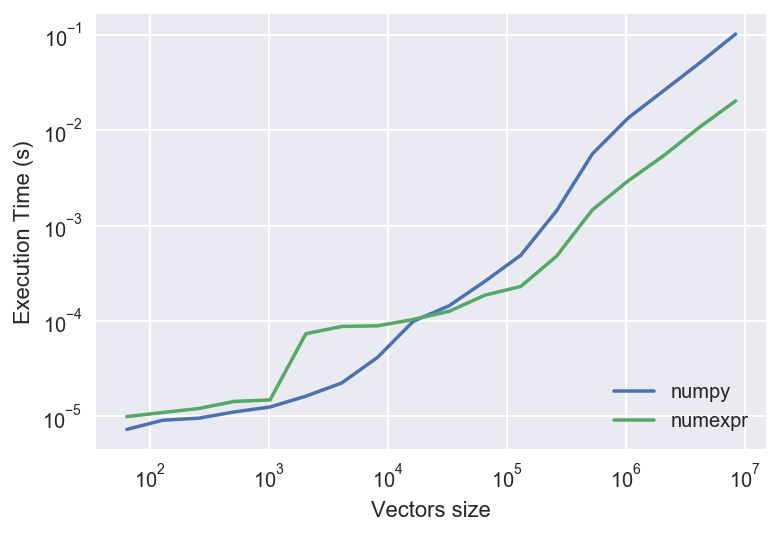

In [104]:
import numexpr as ne
import numpy as np
nrange = (2 ** np.arange(6, 24)).astype(int)

t_numpy = []
t_numexpr = []

for n in nrange:
    a = np.random.random(n)
    b = np.arange(n, dtype=np.double)
    c = np.random.random(n)
    
    c1 = ne.evaluate("a ** 2 + b ** 2 + 2 * a * b * c ", optimization='aggressive')

    t1 = %timeit -oq -n 10 a ** 2 + b ** 2 + 2 * a * b * c
    t2 = %timeit -oq -n 10 ne.re_evaluate()

    t_numpy.append(t1.best)
    t_numexpr.append(t2.best)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

plt.loglog(nrange, t_numpy, label='numpy')
plt.loglog(nrange, t_numexpr, label='numexpr')

plt.legend(loc='lower right')
plt.xlabel('Vectors size')
plt.ylabel('Execution Time (s)');

# References
- [NumPy reference](http://docs.scipy.org/doc/numpy/reference/)
- [Getting the Best Performance out of NumPy](http://ipython-books.github.io/featured-01/)
- [Numpy by Konrad Hinsen](http://calcul.math.cnrs.fr/Documents/Ecoles/2013/python/NumPy%20avance.pdf)

# Maxwell solver with FDTD scheme


[Description of the scheme](https://en.wikipedia.org/wiki/Finite-difference_time-domain_method)

In [30]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10,6)

In [31]:
%matplotlib inline
from tqdm import tqdm_notebook as tqdm
import time
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

nx, ny = 101, 101
vx, dx = np.linspace(0, 1, nx, endpoint=True, retstep=True)
vy, dy = np.linspace(0, 1, ny, endpoint=True, retstep=True)

ex = np.zeros((nx-1, ny), dtype=np.double, order='F')  # champ electrique Ex
ey = np.zeros((nx, ny-1), dtype=np.double, order='F')  # champ electrique Ey
nbiter = 500         # nombre d'iterations en temps
dt = 0.002            # pas de temps
m, n = 2, 2
omega = np.sqrt((m*np.pi)**2+(n*np.pi)**2)
x, y = np.meshgrid(0.5*(vx[:-1]+vx[1:]), 0.5*(vy[:-1]+vy[1:]))

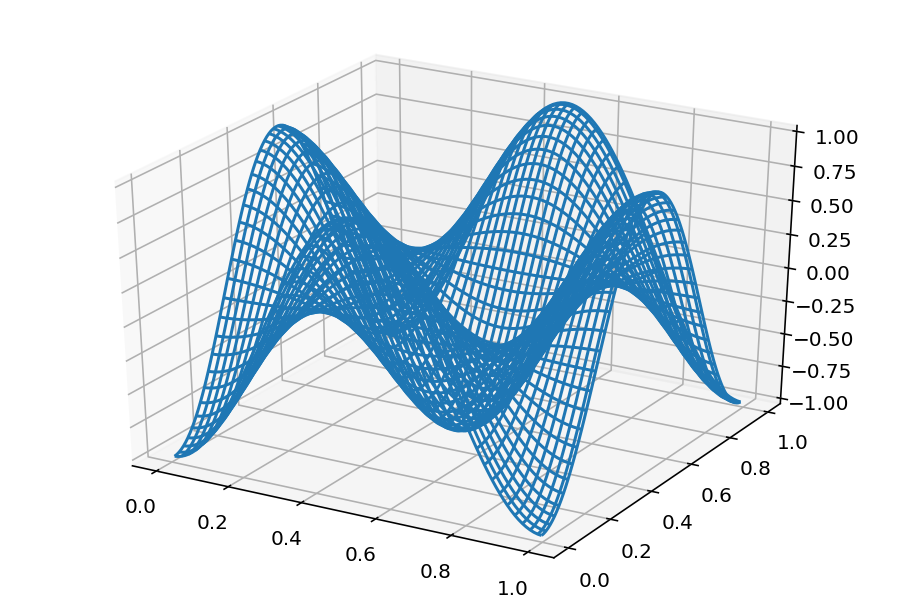

In [32]:
from mpl_toolkits.mplot3d import axes3d
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

fig = plt.figure()
ax = axes3d.Axes3D(fig)

bz = - np.cos(m*np.pi*y) * np.cos(n*np.pi*x) * np.cos(omega*(-0.5*dt))
bz = np.asfortranarray(bz)
wframe = ax.plot_wireframe(x, y, bz, rstride=2, cstride=2)
ax.set_zlim(-1,1);

In [33]:
def update(i, ax, fig):
    ax.cla()

    global ex, ey, bz

    # faraday equation
    bz += dt * ((ex[:, 1:]-ex[:, :-1]) / dy - (ey[1:, :]-ey[:-1, :]) / dx)

    # ampere maxwell equation
    ex[:, 1:-1] += dt*(bz[:, 1:]-bz[:, :-1]) / dy
    ey[1:-1, :] += - dt*(bz[1:, :]-bz[:-1, :]) / dx

    # periodic boundary conditions
    ex[:, 0] += dt*(bz[:, 0]-bz[:, -1]) / dy
    ex[:, -1] = ex[:, 0]
    ey[0, :] += - dt*(bz[0, :]-bz[-1, :]) / dx
    ey[-1, :] = ey[0, :]

    wframe = ax.plot_wireframe(x, y, bz, rstride=2, cstride=2)
    ax.set_zlim(-1, 1)
    return wframe,

In [36]:
ani = animation.FuncAnimation(fig, update, 
        frames=range(200), 
        fargs=(ax, fig), interval=100);



In [37]:
%%time

HTML(ani.to_html5_video())

CPU times: user 19.4 s, sys: 443 ms, total: 19.9 s
Wall time: 20 s
